# DAB200 -- Lab 1

In this lab, you will gain some experience in creating and evaluating random forests models and in manually tuning some hyper-parameters.
See each Part below for specific instructions but overall, keep the following in mind:
 - the code for each Part of this lab should be self-contained, that is, each of **Part 1, 2,** and **3** should contain all the necessary code and not rely on code from another **Part** of the lab in order to run (excluding import statements);
 - all parts of the lab should be done using python, sklearn, pandas, numpy, and matplotlib. 

**Grading:** 

45% of the grade will come from error-free code that accomplishes all the steps outlined in the instructions above and for each part of this lab. Another 45% will come from the comments associated with that code and answers to any questions noted, where the comments explain what the code is doing and why it is important to the overall objective. Thus, comments like "split the data" or "train the model" would receive a grade of 0 as they do not indicate any understanding. For his lab, the comments should be provided within each code cell, using the `#` character. The remaining 10% of the grade will be for formatting and clarity of comments/answers, that is, the lab should be easy to read and understand.  

**What to submit**
You should submit the following:
 - a **zip** file containing:
     - a completed version of this notebook with **all cells executed** and **all output visible**;
     - an html/PDF version of this notebook with all cells executed and all output visible.

**Independent research will most likely be required in order to complete the lab properly.**

## Part 1 - Creating and evaluating a random forest model

In this part of the lab, you should:
 - read in the data;
 - verify that all the data is numeric and that there are no missing values;
 - split the data into training and validation sets (don't worry about creating a final test set);
 - create a random forest model using the data;
 - evaluate the model on both the training and validation sets using MAE and % error.

## Data Description

In [1]:
import pandas as pd # Importing the pandas package

In [2]:
rent = pd.read_csv('house_data.csv') # Reading the dataset called house_data.csv as rent
rent.head()                          # Looking at the top rows of the data

,bedrooms,bathrooms,m2_living,floors,m2_above,m2_basement,m2_lot,view,quality,yr_built,renovated_last_5,city,statezip,price
0,3,1.50,124.0,1.5,124.0,0.0,735.0,0,3,1961,0,37,63,313000.0
1,5,2.50,339.0,2.0,313.0,26.0,841.0,4,5,1927,1,36,59,2384000.0
2,3,2.00,179.0,1.0,179.0,0.0,1110.0,0,4,1972,1,19,27,342000.0
3,3,2.25,186.0,1.0,93.0,93.0,746.0,0,4,1969,1,4,8,420000.0
4,4,2.50,180.0,1.0,106.0,74.0,975.0,0,4,1982,0,32,32,550000.0


In [3]:
rent.tail() # # Looking at the bottom rows of the data

,bedrooms,bathrooms,m2_living,floors,m2_above,m2_basement,m2_lot,view,quality,yr_built,renovated_last_5,city,statezip,price
4595,3,1.75,140.0,1.0,140.0,0.0,591.0,0,4,1960,0,36,63,308166.6667
4596,3,2.50,136.0,2.0,136.0,0.0,704.0,0,3,1989,0,4,7,534333.3333
4597,3,2.50,280.0,2.0,280.0,0.0,652.0,0,3,2015,1,33,38,416904.1667
4598,4,2.00,194.0,1.0,99.0,95.0,616.0,0,3,1980,1,36,72,203400.0000
4599,3,2.50,138.0,2.0,138.0,0.0,753.0,0,4,1996,1,10,27,220600.0000


In [4]:
rent.info() # Basic Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          4600 non-null   int64  
 1   bathrooms         4600 non-null   float64
 2   m2_living         4600 non-null   float64
 3   floors            4600 non-null   float64
 4   m2_above          4600 non-null   float64
 5   m2_basement       4600 non-null   float64
 6   m2_lot            4600 non-null   float64
 7   view              4600 non-null   int64  
 8   quality           4600 non-null   int64  
 9   yr_built          4600 non-null   int64  
 10  renovated_last_5  4600 non-null   int64  
 11  city              4600 non-null   int64  
 12  statezip          4600 non-null   int64  
 13  price             4600 non-null   float64
dtypes: float64(7), int64(7)
memory usage: 503.2 KB


In [5]:
rent.describe() # Discription of the columns in the dataset

,bedrooms,bathrooms,m2_living,floors,m2_above,m2_basement,m2_lot,view,quality,yr_built,renovated_last_5,city,statezip,price
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,3.400870,2.160815,198.753261,1.512065,169.760652,28.988478,1379.849565,0.240652,3.451739,1976.786304,0.636957,26.674348,39.743696,5.519630e+05
std,0.908848,0.783781,89.496245,0.538288,80.108753,43.115435,3333.772073,0.778405,0.677230,29.731848,0.480930,11.982721,20.919517,5.638347e+05
min,0.000000,0.000000,34.000000,1.000000,34.000000,0.000000,59.000000,0.000000,1.000000,1906.000000,0.000000,1.000000,1.000000,0.000000e+00
25%,3.000000,1.750000,136.000000,1.000000,111.000000,0.000000,465.000000,0.000000,3.000000,1957.000000,0.000000,18.000000,22.000000,3.228750e+05
50%,3.000000,2.250000,184.000000,1.500000,148.000000,0.000000,714.000000,0.000000,3.000000,1982.000000,1.000000,33.000000,42.000000,4.609435e+05
75%,4.000000,2.500000,243.000000,2.000000,214.000000,57.000000,1022.000000,0.000000,4.000000,2003.000000,1.000000,36.000000,57.000000,6.549625e+05
max,9.000000,8.000000,1258.000000,3.500000,874.000000,448.000000,99798.000000,4.000000,5.000000,2020.000000,1.000000,44.000000,77.000000,2.659000e+07


## Creating Feature Vector and Target Vector

In [6]:
x = rent[['bedrooms','bathrooms','m2_living', 'floors', 'm2_above', 'm2_basement','m2_lot', 'view', 'quality', 'yr_built', 'renovated_last_5', 'city', 'statezip']] # Creating feature vector
y = rent['price']  # Creating the target vector


In [7]:
x.head() # Looking at the top rows of the feature vector

,bedrooms,bathrooms,m2_living,floors,m2_above,m2_basement,m2_lot,view,quality,yr_built,renovated_last_5,city,statezip
0,3,1.50,124.0,1.5,124.0,0.0,735.0,0,3,1961,0,37,63
1,5,2.50,339.0,2.0,313.0,26.0,841.0,4,5,1927,1,36,59
2,3,2.00,179.0,1.0,179.0,0.0,1110.0,0,4,1972,1,19,27
3,3,2.25,186.0,1.0,93.0,93.0,746.0,0,4,1969,1,4,8
4,4,2.50,180.0,1.0,106.0,74.0,975.0,0,4,1982,0,32,32


In [8]:
y.head() # Looking at the  rows of the target vector

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [9]:
x.values # conveting the feature vector datafraem into an array

array([[  3. ,   1.5, 124. , ...,   0. ,  37. ,  63. ],
       [  5. ,   2.5, 339. , ...,   1. ,  36. ,  59. ],
       [  3. ,   2. , 179. , ...,   1. ,  19. ,  27. ],
       ...,
       [  3. ,   2.5, 280. , ...,   1. ,  33. ,  38. ],
       [  4. ,   2. , 194. , ...,   1. ,  36. ,  72. ],
       [  3. ,   2.5, 138. , ...,   1. ,  10. ,  27. ]])

In [10]:
y.values ## conveting the feature vector datafraem into an array

array([ 313000.    , 2384000.    ,  342000.    , ...,  416904.1667,
        203400.    ,  220600.    ])

## Creating the Random Forest Regressor using the data

In [13]:
from sklearn.model_selection import train_test_split # Importing train_test_split from sklearn.model_selection
x = rent[['bedrooms','bathrooms','m2_living', 'floors', 'm2_above', 'm2_basement','m2_lot', 'view', 'quality', 'yr_built', 'renovated_last_5', 'city', 'statezip']] # Creating feature vector
y = rent['price'] # Creating the target vector
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)# splitting the data into training and testing data with testing data having 20% of the original dataframe.

In [14]:
from sklearn.ensemble import RandomForestRegressor # Importing RandomForestRegressor from sklearn.ensemble

rf = RandomForestRegressor(n_estimators = 10) # Creating the random forest regressor model 10 as the n_estimator
rf.fit(x_train,y_train) # Fitting the training data into the model

RandomForestRegressor(n_estimators=10)

In [15]:

rf.predict(x_train.values) # Predicting the price for the x_train dataset


array([1348500.     ,  910458.2    ,  645450.     , ...,  255498.33333,
        224695.     ,  591733.33331])

In [16]:
y_train.values # Converting y_train values into an array

array([585000.    , 850000.    , 642000.    , ..., 274950.    ,
       185000.    , 497333.3333])

## evaluating the model on the training and validation sets using MAE

In [17]:
from sklearn.metrics import mean_absolute_error # Importing mean_absolute_error from sklearn.metrics


#### Evaluting the model for Training dataset

In [18]:
predictions = rf.predict(x_train) # Predicting the price for the x_train dataset

e = mean_absolute_error(y_train, predictions) # Finding the absolute mean error between the y_train data and the prediction

ep = e*100 / y_train.mean() # Finding the percentage absolute mean error

print(f"${e:.0f} average error; {ep:.2f}% error") # printing the absolute mean error and the percentage absolute mean error

$60963 average error; 10.92% error


#### Evaluting the model for validation dataset

In [19]:
predictions1 = rf.predict(x_test) # Predicting the price for the x_test dataset

e1 = mean_absolute_error(y_test, predictions1) # Finding the absolute mean error between the y_train data and the prediction

ep1 = e1*100 / y_test.mean() # Finding the percentage absolute mean error

print(f"${e1:.0f} average error; {ep1:.2f}% error") # printing the absolute mean error and the percentage absolute mean error

$114951 average error; 21.86% error


## Part 2 - Exploring the `n_estimators` hyper-parameter

In this part of the lab you should: 
 - use a `for` loop to create a random forest model for each value of `n_estimators` from 1 to 30;
 - evaluate each model on both the training and validation sets using MAE;
 - visualize the results by creating a plot of `n_estimators` vs MAE for both the training and validation sets.

After that you should answer the following questions:
 - Which value of `n_estimators` gives the best results? 
 - Explain how you decided that this value for `n_estimators` gave the best results;
 - Why is the plot you created above not smooth?
 - Was the result here better than the result of Part 1? What % better or worse was it?

In [20]:
from sklearn.model_selection import train_test_split # Importing train_test_split from sklearn.model_selection
x = rent[['bedrooms','bathrooms','m2_living', 'floors', 'm2_above', 'm2_basement','m2_lot', 'view', 'quality', 'yr_built', 'renovated_last_5', 'city', 'statezip']] # Creating feature vector
y = rent['price'] # Creating target vector
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # splitting the data into training and testing data with testing data having 20% of the original dataframe.

Train1 = [] # Creating an empty list called Train1
Train1_percent = [] # Creating an empty list called Train1_percent
Test1 = [] # Creating an empty list called Test1
Test1_percent = [] # Creating an empty list called Test1_percent

for n in range(1,31): # Creating a for loop
    rf2 = RandomForestRegressor(n_estimators = n) # Creating the random forest regressor model with n n_estimators
    rf2.fit(x_train,y_train) # Training the random forest regressor model
    predictions = rf2.predict(x_train) # Predicting the price for the x_train dataset
    e_Train = mean_absolute_error(y_train, predictions) # Finding the absolute mean error between the y_train data and the prediction
    ep_Train = e_Train*100 / y_train.mean() # Finding the percentage absolute mean error
    Train1.append(e_Train) # Placing the e_Train into the Train1 list
    Train1_percent.append(ep_Train) # Placing the ep_Train into the Train1_percent list
    predictions1 = rf2.predict(x_test) # Predicting the price for the x_train dataset
    e_Test = mean_absolute_error(y_test, predictions1) # Finding the absolute mean error between the y_test data and the prediction
    ep_Test = e_Test*100 / y_test.mean() # Finding the percentage absolute mean error
    Test1.append(e_Test) # Placing the e_Test into the Test1 list
    Test1_percent.append(ep_Test) # Placing the ep_test into the Test1_percent list

Estimator_list = range(1,31) # Creating a list called Estimator_list

n_estimators_dataframe = pd.DataFrame({'N Estimator' : Estimator_list,
                                  'Train MAE' : Train1,
                                  'Train MAE Precent' : Train1_percent,
                                  'Test MAE' : Test1,
                                  'Test MAE Percent' : Test1_percent}, 
                                  columns=['N Estimator','Train MAE', 'Train MAE Precent','Test MAE','Test MAE Percent']) # Creating a dataframe called n_estimators_list

  
print(n_estimators_dataframe) # Printing the n_estimators_dataframe

    N Estimator     Train MAE  Train MAE Precent       Test MAE  \
0             1  74161.084134          13.507528  181277.006161   
1             2  65405.786776          11.912858  143491.926656   
2             3  63232.862697          11.517087  149538.519483   
3             4  66813.260785          12.169212  157275.141431   
4             5  62295.110544          11.346287  154263.755346   
5             6  57490.445196          10.471176  155966.084749   
6             7  63555.990122          11.575941  155294.231272   
7             8  60763.676045          11.067355  148440.522790   
8             9  60553.053501          11.028993  165675.048521   
9            10  63341.339246          11.536845  164536.782141   
10           11  58771.513685          10.704507  133618.288876   
11           12  56071.297906          10.212696  149951.508579   
12           13  58991.915297          10.744651  142404.221294   
13           14  60565.900488          11.031333  142520.86314

<AxesSubplot:xlabel='N Estimator'>

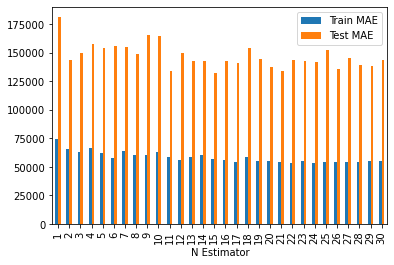

In [21]:
n_estimators_dataframe.plot.bar(x = 'N Estimator', y = ['Train MAE', 'Test MAE']) # Creating a bar graph with MAE on the y axis and the n_estimator on the x axis for both the train and test data

In [35]:
MAE_Train2 = n_estimators_dataframe['Train MAE'].min() # Creating a variable MAE_Train2 to identify the lowest MAE for training data
print(MAE_Train2) # Printing MAE_Train2
MAE_Test2 = n_estimators_dataframe['Test MAE'].min() # Creating a variable MAE_Train2 to identify the lowest MAE for testing data
print(MAE_Test2) # Printing MAE_Test2


53107.80706392739
132244.48782233574


In [36]:
part_2_train_percent = n_estimators_dataframe['Train MAE Precent'].min() # Creating variable part_2_train_percent to indentify min MAE percent
part_2_test_percent = n_estimators_dataframe['Test MAE Percent'].min() # Creating variable part_2_test_percent to indentify min MAE percent

In [37]:
diffrence_Train_percent = part_2_train_percent - ep # Comparing the MAE percent 
print(diffrence_Train_percent) # Printing the diffrence_Train_percent
diffrence_Test_percent = part_2_test_percent - ep1 # Comparing the MAE percent
print(diffrence_Test_percent) # Printing the diffrence_Test_percent

-1.2428942200545485
1.6021841909947234


Q1. Which value of n_estimators gives the best results?
*   The best n estimator for 11the Training data is 24 which correspods with an MAE of 53107.80706392739
*   The best n estimator for the testing/validation data is 14 which correspods with an MAE of 132244.48782233574

Q2. Explain how you decided that this value for n_estimators gave the best results;
*   The mean absolute error of a dataset is the average distance between each data point and the mean. It gives us an idea about the variability in a dataset.<br>
Here's how to calculate the mean absolute deviation.<br>
Step 1: Calculate the mean.<br>
Step 2: Calculate how far away each data point is from the mean using positive distances. These are called absolute deviations.<br>
Step 3: Add those deviations together.<br>
Step 4: Divide the sum by the number of data points.<br>

Reference - <a href="https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/other-measures-of-spread/a/mean-absolute-deviation-mad-review">link text</a>
* For the training data      the best n_estimator is 24 as ith has the lowes MAE. As for the testing data the best n_estimator is 14 as it has the least MAE.

Q3. Why is the plot you created above not smooth?
*   In this code we did not set the parameter random state so when the loop is run the machine learning model run for different bootstrap. As there are different bootstrap for each estimators the error may vary giving us an unsmooth curve.
    
Q4. Was the result here better than the result of Part 1? What % better or worse was it?

*   Yes, the result in the part 2 are better than the result in the part 1 for training dataset, the result are 1.24% better. on the other hand, for the testing data the result of part 1 has a better MAE percent than part 2 by 1.60%



# Caomparision analysis

## Part 3 - Exploring the `max_features` hyper-parameter

In this part of the lab you should: 
 - use a `for` loop to create a random forest model for each value of `max_features` from 1 to the total number of features in the data;
 - for each model, use the value for `n_estimators` as determined in Part 2;
 - evaluate each model on both the training and validation sets using MAE;
 - visualize the results by creating a plot of `max_features` vs MAE for both the training and validation sets.

After that you should answer the following questions:
 - Which value of `max_features` gives the best results?
 - Explain how you decided that this value for `max_features` gave the best results;
 - Was the result here better than the result of Part 2? What % better or worse was it?

In [43]:
from sklearn.model_selection import train_test_split # Importing train_test_split from sklearn.model_selection
x = rent[['bedrooms','bathrooms','m2_living', 'floors', 'm2_above', 'm2_basement','m2_lot', 'view', 'quality', 'yr_built', 'renovated_last_5', 'city', 'statezip']] # Creating feature vector
y = rent['price'] # Creating feature vector
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # splitting the data into training and testing data with testing data having 20% of the original dataframe.

Train2 = [] # Creating an empty list called Train2
Train2_percent = [] # Creating an empty list called Train2_percernt
Test2 = [] # Creating an empty list called Test2
Test2_percent = [] # Creating an empty list called Test2_percent


for m in range(1,14): # Creating a for loop
    rf3 = RandomForestRegressor(n_estimators = 14,max_features = m) # Creating the random forest regressor model with 14 is the n_estimator  as the n_estimator and m max_features(14 as it is the n_estimator as determined for the testing data)
    rf3.fit(x_train,y_train) # Training the random forest regressor model
    predictions = rf3.predict(x_train) # Predicting the price for the x_train dataset
    e_Train = mean_absolute_error(y_train, predictions) # Finding the absolute mean error between the y_train data and the prediction
    ep_Train = e_Train*100 / y_train.mean() # Finding the percentage absolute mean error
    Train2.append(e_Train) # Placing the e_Train into the Train2 list
    Train2_percent.append(ep_Train) # Placing the e_Train into the Train2_percent list
    predictions1 = rf3.predict(x_test) # Predicting the price for the x_test dataset
    e_Test = mean_absolute_error(y_test, predictions1) # Finding the absolute mean error between the y_test data and the prediction
    ep_Test = e_Test*100 / y_test.mean() # Finding the percentage absolute mean error
    Test2.append(e_Test) # Placing the e_Train into the Test2 list
    Test2_percent.append(ep_Test) # Placing the e_Train into the Test2_percent list

Estimator_list1 = range(1,14) # Creating a list called Estimator_list1

max_features_estimators_dataframe = pd.DataFrame({'Max Feature Estimator' : Estimator_list1,
                                            'Train MAE' : Train2,
                                            'Train MAE Precent' : Train2_percent,
                                            'Test MAE' : Test2,
                                            'Test MAE Percent' : Test2_percent}, 
                                            columns=['Max Feature Estimator','Train MAE', 'Train MAE Precent','Test MAE','Test MAE Percent']) # Creating a dataframe called max_features_estimators_list

print(max_features_estimators_dataframe) # Printing the max_features_estimators_dataframe

    Max Feature Estimator     Train MAE  Train MAE Precent       Test MAE  \
0                       1  61335.877413          11.220727  171507.903341   
1                       2  61138.691433          11.184654  152093.489420   
2                       3  58719.748425          10.742135  149954.409402   
3                       4  58000.198492          10.610501  149489.822784   
4                       5  58962.684974          10.786577  151953.731209   
5                       6  57770.166570          10.568419  139474.964956   
6                       7  54193.368134           9.914083  150743.854346   
7                       8  57219.157068          10.467618  146149.817343   
8                       9  54011.891269           9.880884  148649.450066   
9                      10  55208.849737          10.099854  139348.736612   
10                     11  52478.097933           9.600293  149403.492129   
11                     12  55654.898730          10.181454  135796.336914   

<AxesSubplot:xlabel='Max Feature Estimator'>

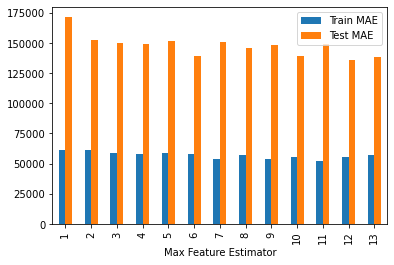

In [44]:
max_features_estimators_dataframe.plot.bar(x = 'Max Feature Estimator', y = ['Train MAE', 'Test MAE']) # Creating a bar graph with MAE on the y axis and the max_features on the x axis for both the train and test data

In [45]:
MAE_Train3 = max_features_estimators_dataframe['Train MAE'].min() # Creating a variable MAE_Train3 to identify the lowest MAE for training data
print(MAE_Train3) # Printing MAE_Train3
MAE_Test3 = max_features_estimators_dataframe['Test MAE'].min() # Creating a variable MAE_Test3 to identify the lowest MAE for training data
print(MAE_Test3) # Printing MAE_Test3

52478.09793286685
135796.33691382763


In [46]:
part_3_train_percent = max_features_estimators_dataframe['Train MAE Precent'].min() # Creating variable part_3_train_percent to indentify min MAE percent
part_3_test_percent = max_features_estimators_dataframe['Test MAE Percent'].min() # Creating variable part_3_test_percent to indentify min MAE percent

In [47]:
diffrence_Train_percent1 = part_3_train_percent - part_2_train_percent# Comparing the MAE percent
print(diffrence_Train_percent) # Printing the diffrence_Train_percent
diffrence_Test_percent1 = part_3_test_percent - part_2_test_percent # Comparing the MAE percent 
print(diffrence_Test_percent1) # Printing the diffrence_Test_percent

-1.2428942200545485
0.22585879778237583


Q1. Which value of max_features gives the best results?
*   The best max feature for the Training data is 12 which correspods with an MAE of 50606.62521440066
*   The best Max feature for the testing/validation data is 9 which correspods with an MAE of 149714.99558194928

Q2. Explain how you decided that this value for max_features gave the best results ?
*   As the error for the Max_Feature = 13 is less so it gives us the best result for both the training and testing data.

Q3. Was the result here better than the result of Part 2? What % better or worse was it?
*   Yes, the result in the part 3 are better than the result in the part 2 for training dataset, the result are 1.24% better. on the other hand, for the testing data the result of part 2 has a better MAE percent than part 3 by 0.22%

### Submitted By

* Sri Sankeerth Koduru - 0768993
* Keshav Yadav - 0770087
* Gurpinder Kaur Matharu - 0749347